# 1. INTRODUCTION


=================================================

MILESTONE 2 

- Nama  : Bimantyo Arya Majid

- Dataset Summary : Dataset berisikan tentang data-data murid yang berpotensi mengalami Depresi. Dataset ini berisikan 18 kolom dengan total 27,9k baris/series, Dataset ini diambil melalui Kaggle dan akan diolah menggunakan pandas, numpy, scikit-learn dan divisualsasikan menggunakan seaborn dan matplotlib

- Objective : Depresi adalah suatu kondisi kesehatan mental yang ditandai dengan perasaan sedih yang berkepanjangan dan kehilangan minat pada aktivitas yang dulunya dinikmati. Kondisi ini dapat memengaruhi cara seseorang berpikir, merasakan, dan berperilaku. Depresi tidak hanya sekadar perasaan sedih sesaat, tetapi merupakan gangguan suasana hati yang berkepanjangan dan dapat memengaruhi berbagai aspek kehidupan seseorang. Maka Creator akan membuat model machine learning untuk mempelajari dan memprediksi student yang berpotensi memiliki Depresi sehingga nantinya dapat dilakukan tindakan preventif dan pengambilan solusi yang tepat untuk student yang terindikasi depresi. 

Model Machine learning ini akan dibuat menggunakan 5 model yaitu KNN, SVM, Decision Tree, Random Forest dan CatBoost dan akan fokus kepada metrics recall sebagai metrics evaluasinya, karena ingin membuat model bisa memprediksi dengan baik student yang memiliki depression (Menekan nilai False Negative dimana FN adalah kondisi ketika prediksi menyatakan salah namun pada realitnya menyatakan benar).

=================================================

# 2. IMPORT LIBRARIES
Berikut merupakan libraries yang akan digunakan selama pengerjaan project 

In [1]:
import pandas as pd # Untuk mempermudah pengolahan data 
import numpy as np # Untuk pengolahan data 
import matplotlib.pyplot as plt # Untuk membantu memvisualisasikan data 
import seaborn as sns # Untuk membantu memvisualisasikan data 
from sklearn.model_selection import train_test_split # Memisahkan data train dan data test
from sklearn.impute import SimpleImputer # Untuk melakukan handling missing value
from sklearn.pipeline import Pipeline as Pipeline # Untuk pembuatan pipeline yang berfokuskan imputing dan scaling
from sklearn.compose import ColumnTransformer # Untuk menggabungkan antara nominal features dan categorical features
from sklearn.preprocessing import StandardScaler, OrdinalEncoder # Untuk melakukan Encoding pada kolom kategorikal dan melakukan Scalling
from sklearn.neighbors import KNeighborsClassifier # Untuk Modelling
from sklearn.svm import SVC # Untuk Modelling
from sklearn.ensemble import RandomForestClassifier # Untuk Modelling
from sklearn.tree import DecisionTreeClassifier # Untuk Modelling
from catboost import CatBoostClassifier # Untuk Modelling
from sklearn.metrics import classification_report # Untuk menampilkan report keseluruhan hasil evaluasi
from sklearn.metrics import confusion_matrix # Untuk membandingkan nilai prediksi dengan nilai aktual
from sklearn.model_selection import cross_val_score # Untuk melihat konsisten scoring 
from sklearn.model_selection import GridSearchCV # Untuk Hyperparameter tuning 
from sklearn.metrics import recall_score # Untuk evaluasi metrics
from sklearn.metrics import roc_auc_score # Untuk melakukan matrix evaluasi dengan roc_auc
import pickle # Untuk serializing and deserializing Python objects menjadi binary format
import json # Untuk serializing and deserializing Python objects menjadi text yang bisa dibaca dengan format bernama JSON (JavaScript Object Notation).


# 3. DATA LOADING

Data loading akan dilakukan menggunakan pandas karena dataset sudah menggunakan format .CSV. Data Frame merupakan tabel atau kumpulan dari suatu series.

In [2]:
# Data Loading

# Data Loading untuk memuat file yang sudah diunduh melalui website kaggle 
df = pd.read_csv('Student Depression Dataset.csv')

# Menggunakan syntax head untuk menampilkan 5 data pertama
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


Setelah berhasil loading dataframe maka akan menampilkan sebuah tabel yang berisikan data penjualan supplemen kesehatan dengan jangka waktu penjualan mingguan. 

## 3.1 MENAMPILKAN SUMMARY DATASET 
Untuk menampilkan Informasi *Summary Data* dapat menggunakan syntax df.info(), dimana akan menampilkan seluruh jumlah kolom, jenis tipe data dan menampilkan jika ada data yang kosong atau bersifat *null*. Setelah itu untuk menampilkan berapa banyak value yang unique dalam setiap kolom dapat menggunakan syntax df.nunique(). 

In [3]:
# Berfungsi untuk melihat summary data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

Berdasarkan hasil syntax diatas dapat diketahui bahwa terdapat 18 kolom dan 27901 baris data yang terdapat pada 1 data frame. Mayoritas kolom sudah memiliki tipe data yang sesuai, namun dapat ditemukan terdapat missing values pada kolom **Financial Stress** nantinya akan dilakukan handling missing values dan dicari data yang hilang termasuk ke dalam kategori MCAR, MAR, atau MNAR. 

In [4]:
# Berfungsi untuk memberikan gambaran data yang memiliki kolom numerikal dalam nilai mean, min, max  
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,27901.0,70442.149421,40641.175216,2.0,35039.00,70684.00,105818.00,140699.0
Age,27901.0,25.822300,4.905687,18.0,21.00,25.00,30.00,59.0
Academic Pressure,27901.0,3.141214,1.381465,0.0,2.00,3.00,4.00,5.0
Work Pressure,27901.0,0.000430,0.043992,0.0,0.00,0.00,0.00,5.0
CGPA,27901.0,7.656104,1.470707,0.0,6.29,7.77,8.92,10.0
Study Satisfaction,27901.0,2.943837,1.361148,0.0,2.00,3.00,4.00,5.0
Job Satisfaction,27901.0,0.000681,0.044394,0.0,0.00,0.00,0.00,4.0
Work/Study Hours,27901.0,7.156984,3.707642,0.0,4.00,8.00,10.00,12.0
Financial Stress,27898.0,3.139867,1.437347,1.0,2.00,3.00,4.00,5.0
Depression,27901.0,0.585499,0.492645,0.0,0.00,1.00,1.00,1.0


Berdasarkan hasil syntax diatas dapat diketahui bahwa mayoritas rata rata umur student adalah 25 tahun dengan range dari 18 tahun hingga 59 tahun dan menghabiskan waktu belajar dengan rata rata 7 jam dalam satu hari.

In [5]:
# Berfungsi untuk menampilkan value unique dalam kolom 
df.nunique()

id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             5
Family History of Mental Illness             2
Depression                                   2
dtype: int64

In [6]:
# Syntax untuk menampilkan isi value unique pada kolom product name, category, location, dan platform
print(f"Profession      : {df['Profession'].unique()}")
print(f"Dietary Habits  : {df['Dietary Habits'].unique()}")
print(f"Sleep Duration  : {df['Sleep Duration'].unique()}")
print(f"Degree          : {df['Degree'].unique()}")

Profession      : ['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
Dietary Habits  : ['Healthy' 'Moderate' 'Unhealthy' 'Others']
Sleep Duration  : ['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours' 'Others']
Degree          : ['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' 'Class 12' 'B.Ed' 'LLB' 'BE'
 'M.Ed' 'MSc' 'BHM' 'M.Pharm' 'MCA' 'MA' 'B.Com' 'MD' 'MBA' 'MBBS' 'M.Com'
 'B.Arch' 'LLM' 'B.Tech' 'BBA' 'ME' 'MHM' 'Others']


## 3.2 PENGECEKAN MISSING VALUES 

Pengecekan *Missing Value* perlu dilakukan untuk memastikan bahwa tidak ada data yang memiliki nilai null, karena jika didapati data yang null dalam suatu kolom maka dapat mempengaruhi hasil dari analisa yang akan dilakukan. Untuk melakukan pengecekan *Missing Value* bisa menggunakan df.isnull().sum() untuk melihat keseluruhan data yang sekiranya memiliki missing values atau bernilai null.

In [7]:
# Untuk melihat secara keseluruhan apabila terdapat missing values 
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

Berdasarkan hasil syntax diatas dapat diketahui bahwa ditemukan kolom yang memiliki *Missing Values* pada kolom Financial Stress. Nanti akan ditentukan untuk jenis missing value yang terdapat merupakan MCAR, MAR, atau MNAR. 

## 3.3 PENGECEKAN DATA DUPLICATE

Pengecekan *Data Duplicate* perlu dilakukan untuk memastikan bahwa data yang dimiliki tidak memiliki nilai yang sama atau duplikat, jika ditemukan data yang memiliki duplikat akan mempengaruhi hasil analisa. Data yang memiliki duplikat juga akan mempengaruhi *Consistency Data*. *Data Duplicate* bisa terjadi karena beberapa hal, misalnya error pada saat melakukan *Data Entry*, gangguan sistem atau pada saat proses integrasi data.

In [8]:
# Untuk melakukan pengecekan data duplicate 
df.duplicated().value_counts()

False    27901
Name: count, dtype: int64

In [9]:
# Berfungsi untuk menampilkan data yang duplikat 
df[df.duplicated()]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


Berdasarkan hasil syntax diatas dapat diketahui bahwa tidak ditemukan data yang bersifat duplikat, maka dari itu tidak akan dilakukan drop dupplicate karena setiap data/baris yang ada bersifat unique.

## 3.4 PENYESUAIAN DATA 

Pada bagian ini akan dilakukan penyesuaian data seperti perubahan nama tiap kolom dan melakukan copy dataset asli untuk berjaga jaga jika suatu saat dataset yang telah diolah rusak, masih terdapat backup dataset originalnya

In [10]:
# Menyalin data agar tetap menjaga data yang asli dan untuk berjaga jaga jika suatu saat data olahan rusak
new_df = df.copy()

In [11]:
# Mengubah nama column agar memiliki huruf yang sama rata dan mengubah spasi menjadi menjadi '_'
new_df.columns = new_df.columns.str.strip().str.lower().str.replace(' ', '_')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   gender                                 27901 non-null  object 
 2   age                                    27901 non-null  float64
 3   city                                   27901 non-null  object 
 4   profession                             27901 non-null  object 
 5   academic_pressure                      27901 non-null  float64
 6   work_pressure                          27901 non-null  float64
 7   cgpa                                   27901 non-null  float64
 8   study_satisfaction                     27901 non-null  float64
 9   job_satisfaction                       27901 non-null  float64
 10  sleep_duration                         27901 non-null  object 
 11  di

In [ ]:
# Pengubahan nama kolom 
new_df = new_df.rename(columns={'have_you_ever_had_suicidal_thoughts_?': 'suicidal_thoughts', 'family_history_of_mental_illness': 'fam_hist_mental_illness'})

Dalam dataset ini terdapat lebih dari 1 profession namun hanya ada 31 baris/series yang merupakan non student dari total 27901 baris. Maka dari itu akan dilakukan filtering untuk mengurangi potensi noise 

In [13]:
# Melakukan filtering terhadap feature profession 
new_df_filtered = new_df[new_df['profession'].str.lower() == 'student'].reset_index(drop=True)
new_df_filtered

,id,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work/study_hours,financial_stress,fam_hist_mental_illness,depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27865,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27866,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27867,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27868,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


Jadi total dataset yang akan digunakan adalah 27870 baris data

# 4. EXPLORATORY DATA ANALYSIS (EDA)

Bagian ini akan dilakukan eksplorasi data secara sederhana pada dataset dengan menggunakan query, grouping, visualisasi sederhana.

## 4.1 Apakah feature academic_pressure mempengaruhi depression(target) ?

Academic pressure adalah pengukuran yang menunjukkan tingkat tekanan yang dihadapi student dalam lingkungan akademis. Ini dapat mencakup stres akibat ujian, tugas, dan ekspektasi akademis secara keseluruhan.

Pada umumnya academic_pressure yang tinggi akan mempengaruhi kesehatan mental dari seorang siswa, makin tinggi academic pressurenya maka semakin tinggi pula tingkat stressnya dan berpotensi mengalami depresi. Berhubung tidak ada definsi untuk skala 1-5, maka saya asumsikan bahwa : 1 = very low, 2 = low, 3 = moderate, 4 = high, 5 = very high.

In [14]:
# Melihat distribusi feature academic_pressure
new_df_filtered['academic_pressure'].value_counts().sort_index()

academic_pressure
0.0       9
1.0    4800
2.0    4176
3.0    7449
4.0    5150
5.0    6286
Name: count, dtype: int64

Berdasarkan hasil syntax terdapat nilai 0 sebanyak 9 baris, dapat dikatakan data tersebut bersifat outlier/ error input maka data dengan input 0 tidak akan dimasukkan ke dalam perhitungan

In [15]:
# Memfilter nilai yang 0 
new_df_filtered = new_df_filtered[new_df_filtered['academic_pressure'] != 0]

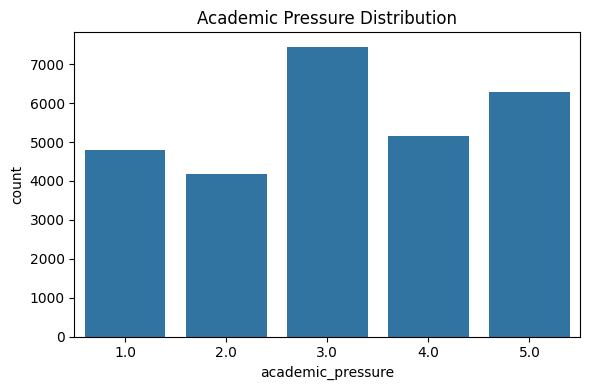

In [16]:
# Membuat plot untuk memvisualisasikan distribusi feature academic_pressure
fig, axs = plt.subplots(figsize=(6,4))

sns.countplot(x='academic_pressure', data=new_df_filtered,)
plt.title('Academic Pressure Distribution')
plt.tight_layout()
plt.show()

Berdasarkan hasil syntax dapat diketahui bahwa mayoritas student memiliki academic_pressure 3 dimana, dapat dikatakan tekanan yang dialami bersifat moderate/sedang dengan total sebanyak 7449 student, kemudian diikuti dengan academic_pressure 5 dimana terdapat 6286 student yang mengalami academic_pressure yang sangat tinggi/ very high. Academic pressure yang tinggi bisa menyebabkan tingkat stress yang tinggi pula, dan tingkat stress yang tinggi dapat menyebabkan depresi

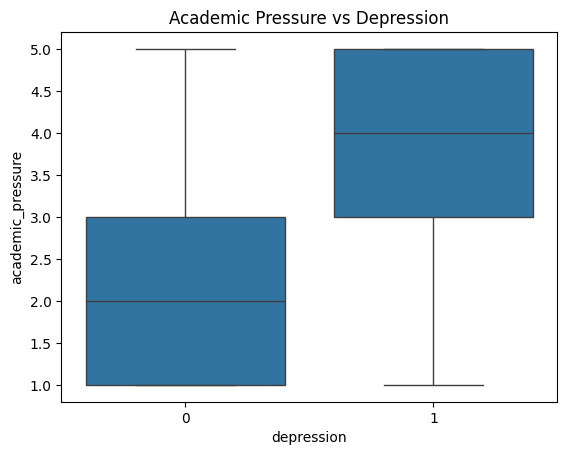

In [17]:
# Melihat bagaimana hubungan antara academic_pressure dengan depression 
sns.boxplot(x='depression', y='academic_pressure', data=new_df_filtered)
plt.title('Academic Pressure vs Depression')
plt.show()

Berdasarkan grafik box plot diatas, dapat dikatakan bahwa student yang terdiagnosa dengan depresi cenderung memiliki academic pressure yang tinggi dengan nilai median student yang depresi berada pada nilai 4 dibandingkan dengan student yang tidak mengalami depresi nilai mediannya terdapat pada 2. Hal ini dapat dikatakan bahwa academic pressure merupakan salah satu key factor yang berhubungan dengan mental health student.

## 4.2 Apakah feature study_satisfaction mempengaruhi depression(target) ?

study_satisfaction adalah Indikator seberapa puas siswa terhadap studinya, yang dapat berkorelasi dengan kesejahteraan mental.

Berhubung tidak ada definsi untuk skala 1-5, maka saya asumsikan bahwa : 1 = Very Unsatisfied, 2 = Unsatisfied, 3 = Neutral, 4 = Satisfied, 5 = Very Satisfied.

In [18]:
# Melihat distribusi feature study_satisfaction
new_df_filtered['study_satisfaction'].value_counts().sort_index()

study_satisfaction
0.0       3
1.0    5446
2.0    5834
3.0    5811
4.0    6350
5.0    4417
Name: count, dtype: int64

Berdasarkan hasil syntax terdapat nilai 0 sebanyak 10 baris, dapat dikatakan data tersebut bersifat outlier/ error input maka data dengan input 0 tidak akan dimasukkan ke dalam perhitungan

In [19]:
# Memfilter nilai yang 0 
new_df_filtered = new_df_filtered[new_df_filtered['study_satisfaction'] != 0]

Berdasarkan hasil syntax terdapat nilai 0 sebanyak 3 baris, dapat dikatakan data tersebut bersifat outlier/ error input maka data dengan input 0 tidak akan dimasukkan ke dalam perhitungan

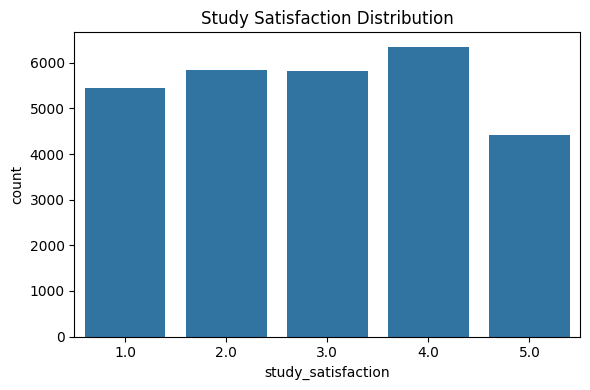

In [20]:
# Membuat plot untuk memvisualisasikan distribusi feature study_satisfaction
fig, axs = plt.subplots(figsize=(6,4))

sns.countplot(x='study_satisfaction', data=new_df_filtered,)
plt.title('Study Satisfaction Distribution')
plt.tight_layout()
plt.show()

Berdasarkan hasil syntax dapat diketahui bahwa mayoritas student puas dengan usaha belajar mereka, namun terdapat banyak juga student yang merasa tidak puas dengan hasil belajar mereka.

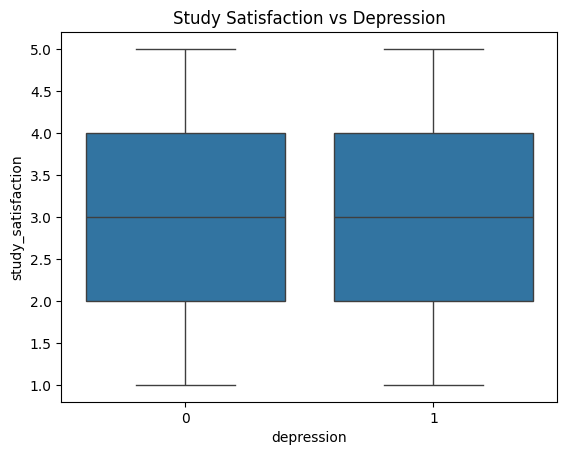

In [21]:
# Melihat bagaimana hubungan antara study_satisfaction dengan depression 
sns.boxplot(x='depression', y='study_satisfaction', data=new_df_filtered)
plt.title('Study Satisfaction vs Depression')
plt.show()

Berdasarkan grafik box plot diatas, dapat dikatakan bahwa student yang terdiagnosa depresi dan tidak depresi memiliki nilai kepuasan belajar yang sama dengan nilai median 3 pada setiap grup. Hal ini dapat dikatakan bahwa study satisfaction mungkin tidak terlalu berpengaruh dengan feature depresi

## 4.3 Apakah feature financial_stress mempengaruhi depression(target) ?

financial_stress adalah pengukuran stres yang dialami karena masalah keuangan, yang dapat memengaruhi kesehatan mental.

Pengelolaan finansial yang tidak baik dapat berpotensi menyebabkan tingkat stress yang tinggi, dan tingkat yang stress yang tinggi dapat menyebabkan depresi. Berhubung tidak ada definsi untuk skala 1-5, maka saya asumsikan bahwa : 1 = very low, 2 = low, 3 = moderate, 4 = high, 5 = very high.

In [22]:
# Melihat distribusi feature financial_stress
new_df_filtered['financial_stress'].value_counts().sort_index()

financial_stress
1.0    5114
2.0    5058
3.0    5214
4.0    5769
5.0    6700
Name: count, dtype: int64

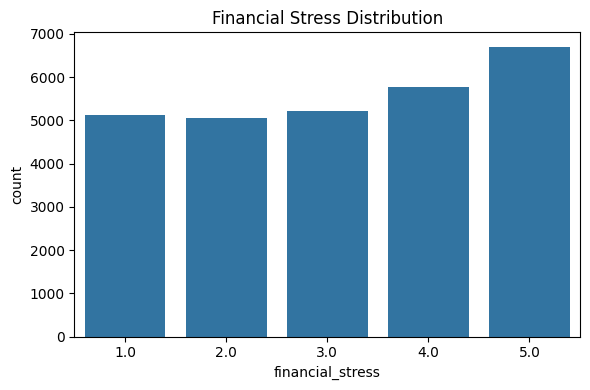

In [23]:
# Membuat plot untuk memvisualisasikan distribusi feature financial_stress
fig, axs = plt.subplots(figsize=(6,4))

sns.countplot(x='financial_stress', data=new_df_filtered,)
plt.title('Financial Stress Distribution')
plt.tight_layout()
plt.show()

Berdasarkan hasil syntax diatas dapat diketahui bahwa terdapat banyak sekali student yang memiliki nilai financial stress 5 atau paling tinggi dengan total 6700 baris. Hal dapat dikatakan bahwa mayoritas student mengalami financial stress yang cukup tinggi

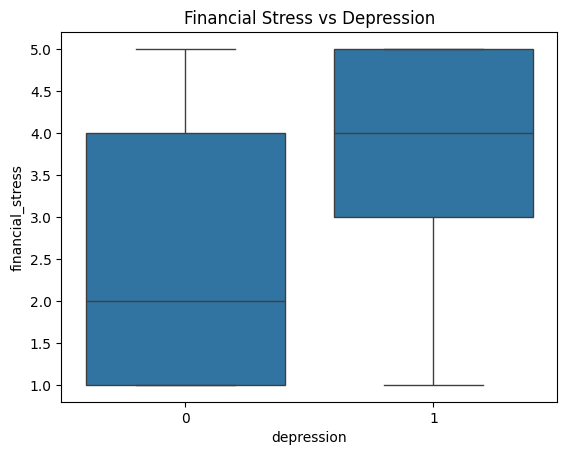

In [24]:
# Melihat bagaimana hubungan antara financial_stress dengan depression 
sns.boxplot(x='depression', y='financial_stress', data=new_df_filtered)
plt.title('Financial Stress vs Depression')
plt.show()

Berdasarkan grafik box plot diatas, dapat dikatakan bahwa student yang terdiagnosa dengan depresi cenderung memiliki finansial stress yang tinggi dengan nilai median student yang depresi berada pada nilai 4 dibandingkan dengan student yang tidak mengalami depresi nilai mediannya terdapat pada 2. Hal ini mengindikasikan bahwa student yang mengalami depresi kemungkinan cenderung memiliki finansial stress yang tinggi

## 4.4 Bagaimana korelasi antara feature sleep_duration dengan academic_pressure ?

Umumnya sleep_duration akan berpengaruh terhadap academic_pressure karena semakin tinggi tekanan akademik biasanya akan memengaruhi jam tidur dari student 

Data pada feature sleep duration bersifat object dengan value Less than 5 hours, 5-6 hours, 7-8 hours, More than 8 hours

In [ ]:
# Membuat kolom baru yang berisikan konversi yang bersifat ordinal 
sleep_map = {
    'Less than 5 hours': 1,
    '5-6 hours': 2,
    '7-8 hours': 3,
    'More than 8 hours': 4
}

new_df_filtered['sleep_encoded'] = new_df_filtered['sleep_duration'].map(sleep_map)
new_df_filtered

,id,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work/study_hours,financial_stress,fam_hist_mental_illness,depression,sleep_encoded
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,2.0
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0,2.0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0,1.0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1,3.0
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27865,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0,2.0
27866,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0,1.0
27867,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0,2.0
27868,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1,1.0


In [26]:
# Melihat korelasi uji pearson antara sleep_encoded dengan academic_pressure
new_df_filtered[['sleep_encoded', 'academic_pressure']].corr()

,sleep_encoded,academic_pressure
sleep_encoded,1.000000,-0.043329
academic_pressure,-0.043329,1.000000


Berdasarkan hasil uji pearson didapatkan nilai -0.043 dimana sangat mendekati 0 yang artinya tidaka ada relationship yang bersifat linear. Nilai bersifat negative dimana menandakan nilai academic pressure yang tinggi bisa jadi berhubungan dengan durasi tidur yang rendah tapi hubungannya sangat lemah 

In [27]:
# Melihat Distribusi data
new_df_filtered['sleep_encoded'].value_counts()

sleep_encoded
1.0    8297
3.0    7335
2.0    6175
4.0    6033
Name: count, dtype: int64

In [28]:
# Membuat crosstab untuk melihat secara detail persebaran datanya 
sleep_ap = pd.crosstab(new_df_filtered['sleep_encoded'], new_df_filtered['academic_pressure'])
print(sleep_ap)

academic_pressure   1.0   2.0   3.0   4.0   5.0
sleep_encoded                                  
1.0                1291  1222  2150  1569  2065
2.0                1061   957  1635  1215  1307
3.0                1255  1032  2132  1293  1623
4.0                1193   960  1526  1066  1288


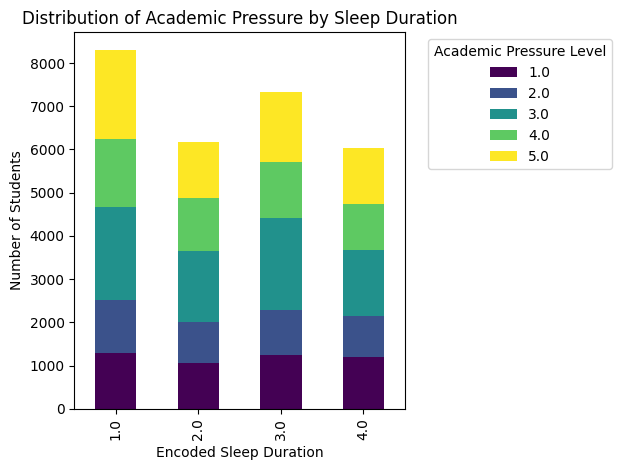

In [29]:
# Membuat plot visualisasi
sleep_ap.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Academic Pressure by Sleep Duration')
plt.xlabel('Encoded Sleep Duration')
plt.ylabel('Number of Students')
plt.legend(title='Academic Pressure Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Berdasarkan hasil barplot diatas dapat diketahui bahwa mayoritas student memiliki jam tidur yang sangat minim kurang dari 5 jam dan dapat dilihat bahwa banyak student yang memiliki academic pressure tinggi dan durasi tidur yang rendah dengan total sebanyak 2065 student, hal ini dapat diasumsikan student dengan high academic pressure cenderung memiliki jam tidur yang minim

## 4.5 Apakah work/study hours mempengaruhi CGPA

CGPA adalah Rata-rata nilai kumulatif siswa, yang mencerminkan kinerja akademik secara keseluruhan.

Jam belajar biasanya akan mempengaruhi nilai dari suatu siswa, semakin tinggi jam belajar, maka semakin tinggi nilainya

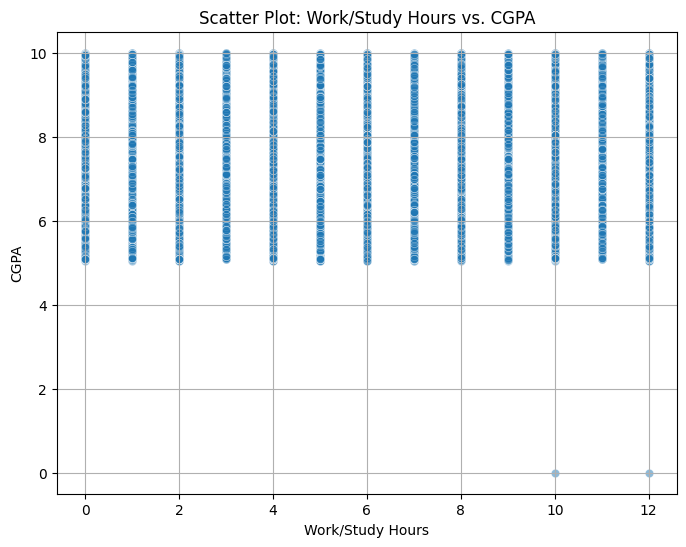

In [30]:
# Membuat plot visual
plt.figure(figsize=(8, 6))
sns.scatterplot(x='work/study_hours', y='cgpa', data=new_df_filtered, alpha=0.5)
plt.title('Scatter Plot: Work/Study Hours vs. CGPA')
plt.xlabel('Work/Study Hours')
plt.ylabel('CGPA')
plt.grid(True)
plt.show()

In [31]:
# Mencari korelasi antara jam belajar dan cgpa
correlation = new_df_filtered['work/study_hours'].corr(new_df_filtered['cgpa'])
print(f"Correlation between work/study hours and CGPA: {correlation}")

Correlation between work/study hours and CGPA: 0.0021633439093357632


Berdasarkan hasil uji korelasi sangat mendekati 0 dimana tidak ada hubungan linear antara wokr/study hours dan CGPA, hal ini menandakan jika student memiliki lebih banyak jam belajar belum tentu memiliki CGPA yang baik.

## 4.6 Bagaimana hubungan antara suicidal_thoughts dan depression(target) ?

Pemikiran untuk bunuh diri sering kali berkaitan erat dengan adanya depresi. Hal ini penting untuk mengetahui risiko dan agar bisa melakukan tindakan preventif sedari dini.

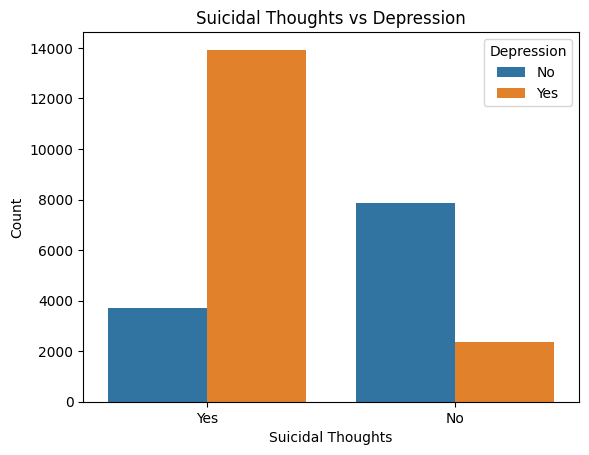

In [32]:
# Melihat Perbandingan distribusi orang yang memiliki suicidal_thoughts dan depression
sns.countplot(x='suicidal_thoughts', hue='depression', data=new_df_filtered)
plt.title('Suicidal Thoughts vs Depression')
plt.xlabel('Suicidal Thoughts')
plt.ylabel('Count')
plt.legend(title='Depression', labels=['No', 'Yes'])  # Optional: map 0/1
plt.show()

Berdasarkan hasil grafik barplot dapat diketahui bahwa mayoritas student yang memiliki pemikiran untuk bunuh diri cenderung mengalami depresi.  

## 4.7 Apakah kebiasaan diet mengindikasikan orang yang mengalami depresi ?

In [33]:
# Melihat distribusi kolom dietary_habits
new_df_filtered['dietary_habits'].value_counts()

dietary_habits
Unhealthy    10305
Moderate      9903
Healthy       7638
Others          12
Name: count, dtype: int64

Pada bagian others akan dilakukan filter karena dianggap outlier dan hanya akan menimbulkan noise 

In [34]:
# Memfilter nilai yang others
new_df_filtered = new_df_filtered[new_df_filtered['dietary_habits'] != 'Others']

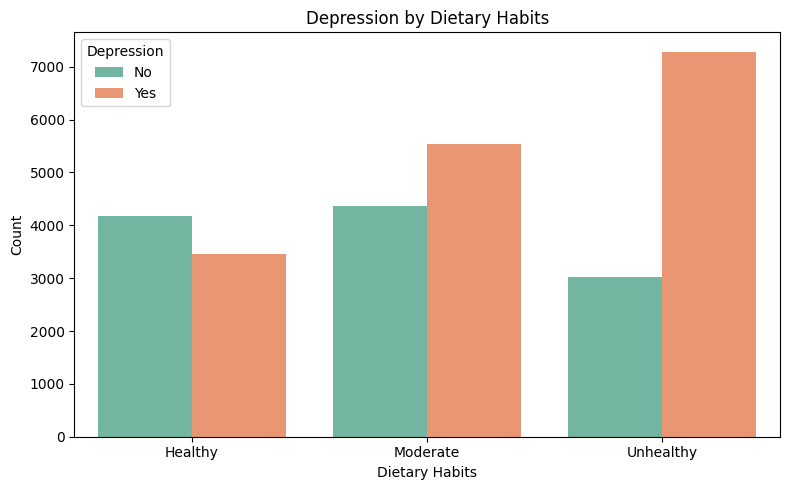

In [35]:
plt.figure(figsize=(8, 5))
sns.countplot(data=new_df_filtered, x='dietary_habits', hue='depression', palette='Set2')
plt.title('Depression by Dietary Habits')
plt.ylabel('Count')
plt.xlabel('Dietary Habits')
plt.legend(title='Depression', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

Berdasarkan hasil barplot diatas dapat dikatakan bahwa pada grup student yang memiliki pola diet sehat cenderung tidak mengalami depresi, sedangkan pada grup student yang memiliki pola diet sedang menunjukan bahwa mayoritas studentnya mengalami depresi dan pada grup student yang memiliki diet unhealthy/ tidak sehat didominasi oleh student yang memiliki depresi. Hal ini dapat dikatakan bahwa student yang memiliki diet tidak sehat cenderung mengalami depresi 

# 5. FEATURE ENGINEERING

Pada feature engineering akan dilakukan persiapan data untuk pelatihan model seperti pembagian train test, transformasi data dan proses lainnya

## 5.1 HANDLING CARDINALITY 

Handling cardinality digunakan untuk mengecek varietas label pada kolom kategorikal

In [36]:
# Mengecek Cardinailty pada setiap kolom yang memiliki object untuk mengetahui 

print('Jumlah label kategori di variabel Gender                     : {}'.format(len(new_df_filtered.gender.unique())))
print('Jumlah label kategori di vairabel City                       : {}'.format(len(new_df_filtered.city.unique())))
print('Jumlah label kategori di vairabel Profession                 : {}'.format(len(new_df_filtered.profession.unique())))
print('Jumlah label kategori di vairabel Sleep Duration             : {}'.format(len(new_df_filtered.sleep_duration.unique())))
print('Jumlah label kategori di vairabel Dietary Habits             : {}'.format(len(new_df_filtered.dietary_habits.unique())))
print('Jumlah label kategori di vairabel Degree                     : {}'.format(len(new_df_filtered.degree.unique())))
print('Jumlah label kategori di vairabel Suicidal Thoughts          : {}'.format(len(new_df_filtered.suicidal_thoughts.unique())))
print('Jumlah label kategori di Family Historical Mental illness    : {}'.format(len(new_df_filtered.fam_hist_mental_illness.unique())))
print('Jumlah keseluruhan data Student Depression                   : {}'.format(len(new_df_filtered)))

Jumlah label kategori di variabel Gender                     : 2
Jumlah label kategori di vairabel City                       : 52
Jumlah label kategori di vairabel Profession                 : 1
Jumlah label kategori di vairabel Sleep Duration             : 5
Jumlah label kategori di vairabel Dietary Habits             : 3
Jumlah label kategori di vairabel Degree                     : 28
Jumlah label kategori di vairabel Suicidal Thoughts          : 2
Jumlah label kategori di Family Historical Mental illness    : 2
Jumlah keseluruhan data Student Depression                   : 27846


Terlihat mayoritas data memiliki cardinality yang rendah, hanya pada City dan Degree saja yang memiliki nilai cardinality lebih dari 10 namun tidak akan dilakukan handling cardinality karena kolom kategori yang akan digunakan tidak terlalu banyak mengandung cardinality 

## 5.2 SPLIT ANTARA X (FEATURES) DAN Y (TARGET)

X (Features) adalah variabel yang digunakan untuk membantu memprediksi
y (Target) adalah variabel yang ingin di prediksi

In [37]:
# Split antara X dan Y 
X = new_df_filtered.drop(['depression', 'suicidal_thoughts'], axis=1)  # Drop  target column untuk mendapatkan features
y = new_df_filtered['depression']               # Target column

# Menampilkan dataframe X yang telah di drop column
X

,id,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,work/study_hours,financial_stress,fam_hist_mental_illness,sleep_encoded
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,3.0,1.0,No,2.0
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,3.0,2.0,Yes,2.0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,9.0,1.0,Yes,1.0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,4.0,5.0,Yes,3.0
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,1.0,1.0,No,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27865,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,7.0,1.0,Yes,2.0
27866,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,0.0,3.0,Yes,1.0
27867,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,12.0,2.0,No,2.0
27868,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,10.0,5.0,No,1.0


Kolom suicidal_thoughts memiliki peran paling besar dalam dataset ini, dari 27 ribu baris data, 16 ribu data menyatakan depresi dan terdapat 13 ribu orang yang depresi memiliki suicidal thoughts dan hanya 2 ribu orang yang menyatakan depresi namun tidak memiliki suicidal thoughts. Tujuan dari project ini ingin model untuk belajar /early detection agar student mengetahui apakah dirinya mengalami depresi atau tidak. Karena kolom suicidal thoughts sangat mempengaruhi itu, dan tidak ingin terjadi target leakage maka akan dilakukan drop terhadap kolom suicidal_thoughts

### 5.2.1 MEMISAHKAN ANTARA TRAIN SET DAN TES SET 

Train set digunakan untuk melatih model, agar bisa mempelajari pola dan hubungan data.
Tes set digunakan untuk menghitung performa train model pada data yang belum diketahui

In [38]:
# Memisahkan antara train set dan tes set menggunakan train_test_split dari sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # test size digunakan untuk menentukan antara data tes dan data train, random state hanya mengontrol pengacakan
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (22276, 17)
Test Size (5570, 17)


## 5.3 HANDLING MISSING VALUE 

Data yang hilang bisa berupa Missing at random(MAR), Missing completely at random(MCAR), Missing not at random(MNAR)

- MCAR (Missing Completely at Random):
Data hilang secara acak sempurna. Artinya, kemungkinan suatu data hilang tidak bergantung pada nilai data itu sendiri.

- MAR (Missing at Random):
Data hilang secara acak. Kemungkinan data hilang bergantung pada data lain yang tersedia dalam dataset.

- MNAR (Missing Not at Random):
Data hilang tidak secara acak. Kemungkinan data hilang bergantung pada nilai data yang hilang itu sendiri.

In [39]:
# Menampilkan total missing value pada X_train
X_train.isnull().sum()

id                          0
gender                      0
age                         0
city                        0
profession                  0
academic_pressure           0
work_pressure               0
cgpa                        0
study_satisfaction          0
job_satisfaction            0
sleep_duration              0
dietary_habits              0
degree                      0
work/study_hours            0
financial_stress            2
fam_hist_mental_illness     0
sleep_encoded              13
dtype: int64

Berdasarkan syntax dapat diketahui bahwa nilai missing pada financial_stress termasuk MCAR (Missing Completely at Random) berarti data hilang sepenuhnya secara acak, tanpa ada pola atau hubungan dengan data yang diamati atau tidak diamati. Karena tidak ada relevansi data yang hilang dengan kolom yang lain. Hal ini bisa saja terjadi karena error saat entry data. Pada bagian sleep_encoded tidak akan dihandle missing value karena feature tersebut tidak akan digunakan dalam model

In [40]:
# Mengisi missing value menggunakan Simple Imputer 
imputer = SimpleImputer(strategy='most_frequent')

# Fit hanya ke X_train
imputer.fit(X_train[['financial_stress']])

X_train[['financial_stress']] = imputer.transform(X_train[['financial_stress']])
X_test[['financial_stress']] = imputer.transform(X_test[['financial_stress']])

Pengisian Missing value menggunakan Library Simple Imputer dengan menggunakan nilai most_frequent untuk mengisi nilai yang kosong karena feature bersifat oridnal category jadi menggunakan nilai yang paling banyak

## 5.4 HANDLING OUTLIER 

Outlier bisa terjadi karena beberapa hal, bisa jadi karena error saat penginputan data, terjadi secara natural, error yang disengajakan dan sampling error

In [41]:
# Mengecek distribution data setiap kolom 
num_cols = list(X_train.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, round(X_train[col].skew(),1), np.where((round(X_train[col].skew(),1) <= 0.5) & (round(X_train[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])



skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

,nama kolom,nilai skewness,distribution
0,id,-0.0,normal
1,age,0.1,normal
2,academic_pressure,-0.1,normal
3,work_pressure,0.0,normal
4,cgpa,-0.1,normal
5,study_satisfaction,0.0,normal
6,job_satisfaction,149.3,skewed
7,work/study_hours,-0.5,normal
8,financial_stress,-0.1,normal
9,sleep_encoded,0.1,normal


In [42]:
# Fungsi untuk membuat histogram and boxplot.
# Fungsi ini mengambil dataframe dan variable interest sebagai arguments.

def diagnostic_plots(dataframe1_clone, variable):
    # Mendefinisikan figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(dataframe1_clone[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=dataframe1_clone[variable])
    plt.title('Boxplot')

    plt.show()

age - Distribution


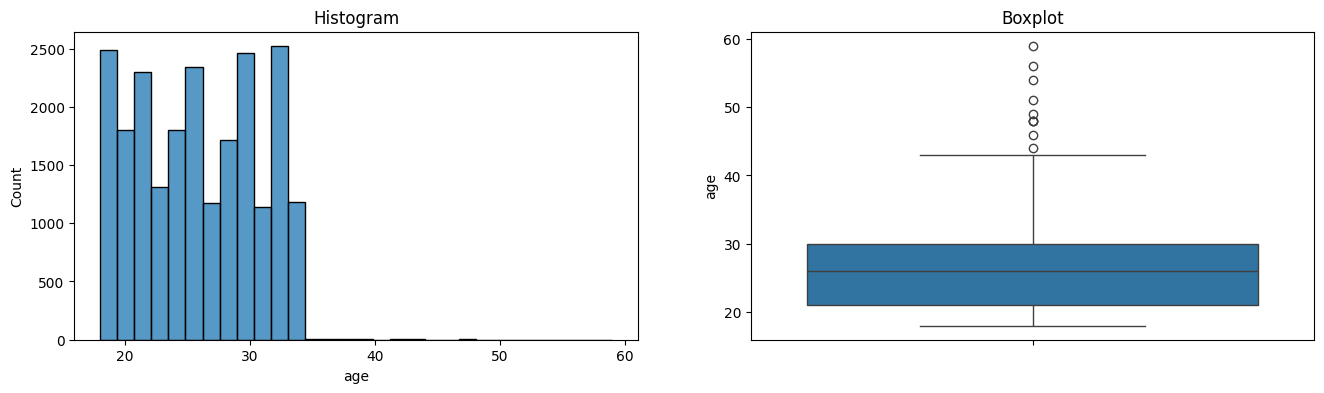

cgpa - Distribution


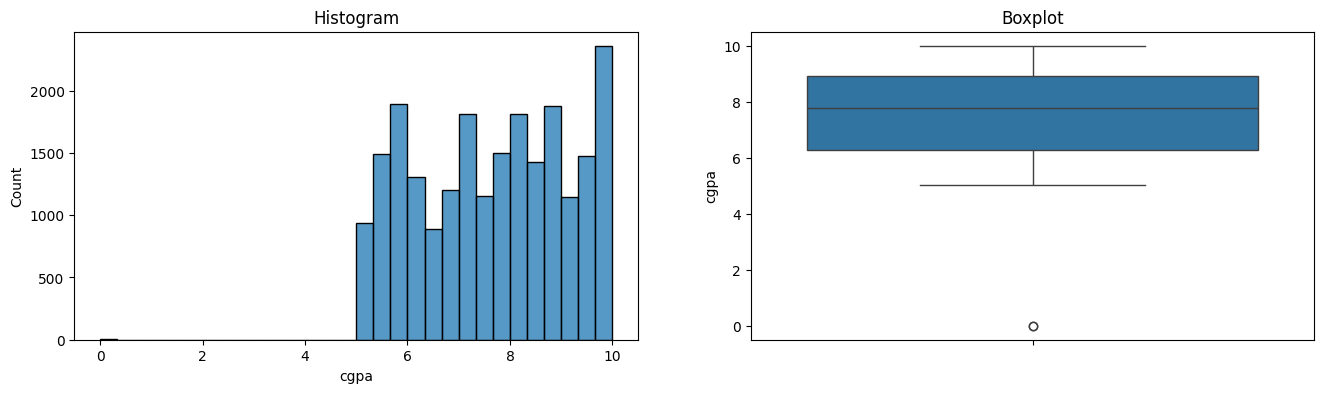

work/study_hours - Distribution


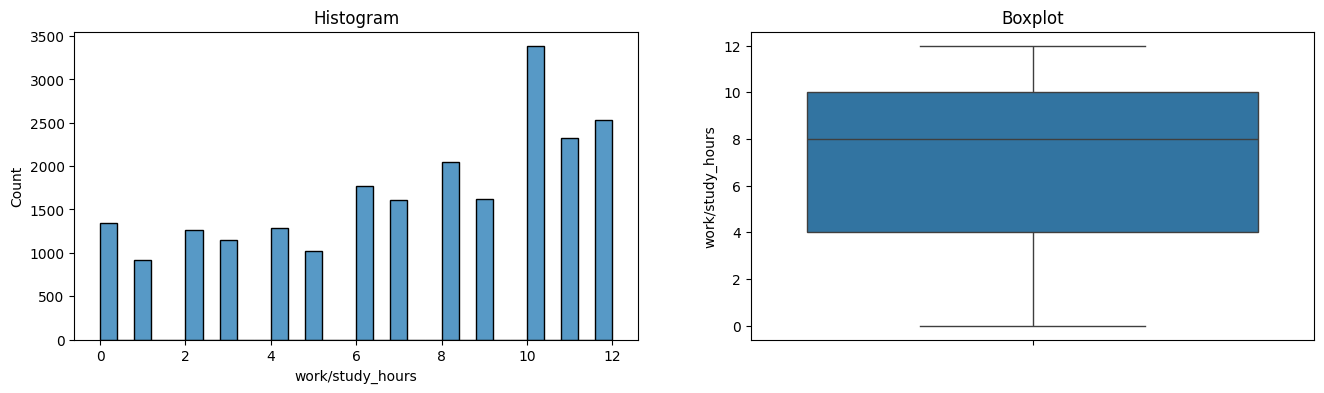

In [43]:
# Menampilkan grafik hisogram dan boxplot
print('age - Distribution')
diagnostic_plots(X_train, 'age')

print('cgpa - Distribution')
diagnostic_plots(X_train, 'cgpa')

print('work/study_hours - Distribution')
diagnostic_plots(X_train, 'work/study_hours')

Berdasarkan hasil syntax diatas didapatkan mayoritas distribusi data memiliki data yang normal dan hanya pada kolom job_satisfaction yang memiliki distribusi data skewed. Terlepas dari itu kolom/features yang benar benar memiliki tipe data numeric hanya pada age, cgpa dan work/study_hours. Selain itu mayoritas datanya bersifat ordinal category. Jika data yang bersifat ordinal category memiliki nilai skewed yang tinggi tidak akan dilakukan handling outlier, kenapa? karena data aslinya berupa categorical bukan pure numeric. Jadi tidak akan dihandling outlier.

## 5.5 FEATURE SELECTION, ENCODING dan SCALING

Feature selection adalah bagian dimana pemilihan feature mana saja yang nantinya akan digunakan model untuk predict. Berdasarkan domain knowledge dan EDA dapat diketahui bahwa feature yang tidak relevan akan dilakukan drop, dan feature tersebut adalah id, city, degree, job_satisfaction, work_pressure, suicidal_thought, dan sleep_encoded. Pada feature job_satisfaction dan work_pressure mayoritas datanya bersifat 0 hal ini mungkin dikarenakan mayoritas datanya adalah student jadi mereka masih belum bekerja atau sedang tidak bekerja.

# 5.5.1 ADJUSTMENT DATA PADA KOLOM sleep_duration, dietary_habits, work/study hours dan cgpa

In [44]:
# Before fitting the pipeline
X_train = X_train[~X_train['sleep_duration'].isin(['Others'])]
X_test = X_test[~X_test['sleep_duration'].isin(['Others'])]

Memfilter pada feature sleep_duration tidak menggunakan data Others karena hanya terdapat 18 data yang bisa dianggap outlier dan berpotensi menyebabkan error

In [45]:
# Before fitting the pipeline
X_train = X_train[~X_train['dietary_habits'].isin(['Others'])]
X_test = X_test[~X_test['dietary_habits'].isin(['Others'])]

Memfilter pada feature dietary_habits tidak menggunakan data Others karena hanya terdapat 12 data yang bisa dianggap outlier dan berpotensi menyebabkan error

In [46]:
median_hours = X_train.loc[X_train['work/study_hours'] != 0, 'work/study_hours'].median()
X_train['work/study_hours'] = X_train['work/study_hours'].replace(0, median_hours)
X_test['work/study_hours'] = X_test['work/study_hours'].replace(0, median_hours)

Ditemukan data 0 pada work/study hour dimana pada umumnya student tidak mungkin tidak belajar sama sekali hal ini bisa terjadi karena bad data input maka dari itu akan dilakukan median imput untuk membuat data tetap stabil berhubung data yang 0 terdapat 1700 baris data, Hal ini diperhitungkan menggunakan nilai median entri bukan nol untuk menjaga volume dan integritas data.”

In [47]:
# Memfilter data cgpa yang memiliki nilai 0
X_train = X_train[X_train['cgpa'] != 0]
X_test = X_test[X_test['cgpa'] != 0]

Ditemukan data 0 pada cgpa dimana pada umumnya student tidak mungkin tidak memiliki nilai sama sekali hal ditemukan hanya pada 1 baris saja ini bisa terjadi karena bad data input maka dari itu akan dilakukan filtering

In [48]:
# Menyamakan jumlah baris 
y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]

In [49]:
# Melakukan drop pada kolom yang tidak terlalu berpengaruh 
columns_to_drop = ['id','city','profession', 'degree', 'job_satisfaction', 'work_pressure', 'sleep_encoded']
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

# Mendefinisikan numerical and categorical features
numerical_features = ['cgpa', 'work/study_hours', 'age']
categorical_features = ['gender', 'sleep_duration', 'dietary_habits', 'fam_hist_mental_illness']
ordinal_features = ['academic_pressure', 'financial_stress', 'study_satisfaction']

In [ ]:
# Ordinal encoding untuk semua kategorikal karena mayoritas datanya ordinal category dan binary 
cat_transformer = OrdinalEncoder(categories=[
    ['Male', 'Female'],  # gender
    ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours'],  # sleep_duration
    ['Unhealthy', 'Moderate', 'Healthy'], # dietary_habits
    ['No', 'Yes'],    # family_history
])

# Numerik: scaling
num_transformer = StandardScaler()

# Ordinal : Passthrough tidak dilakukan apa apa karena sudah bersifat ordinal
ord_transformer = 'passthrough'

# Gabungkan keduanya
preprocessor = ColumnTransformer([
    ('num', num_transformer, numerical_features),
    ('cat', cat_transformer, categorical_features),
    ('ord', ord_transformer, ordinal_features)
    ])

Pada bagian ini mendefinisikan encoding dan scaling yang akan digunakan menggunakan OrdinalEncoder karena mayoritas data bersifat ordinal category dan binary. Sedangkan Scaling menggunakan StandartScaler karena data numeric mayoritas memiliki distribusi yang normal maka lebih cocok untuk menggunakan StandartScaler dan terhadap data yang sudah bersifat ordinal tidak akan dilakukan apapun karena sudah bersifat ordinal namun tetap ikut dalam komputasi

# 6. MODEL DEFINITION

Pendefinisian model menggunakan KNN, SVC, Decision Tree, RandomForest, dan Catboost

In [51]:
# KNN
knn_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),# Bagian ColumnTransformer
    ('knn', KNeighborsClassifier()) # Model yang digunakan
])

# SVM
svm_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),# Bagian ColumnTransformer
    ('svm', SVC(probability=True)) # Model yang digunakan
])

# Decision Tree
dec_tree_pipeline = Pipeline(steps=[  
    ('preprocessing', preprocessor), # Bagian ColumnTransformer
    ('decision_tree', DecisionTreeClassifier()) # Model yang digunakan
])

# Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor), # Bagian ColumnTransformer
    ('random_forest', RandomForestClassifier()) # Model yang digunakan
])

catboost_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('catboost', CatBoostClassifier(verbose=0, random_state=42))
])

Model yang akan digunakan adalah KNN, SVC, Decision Tree, Random Forrest dan Catboost karena fokus pada project ini merupakan supervised learning dengan classification, ingin memprediksi student yang memiliki potensi depresi sehingga dapat melakukan tindakan preventif sedari dini. Penggunaan KNN karena KNN model yang simple, non parametric. Penggunaan SVM karena cocok dan bisa memiliki performa yang baik pada data yang memiliki dimensional tinggi, bisa menghandle pemisahan kelas dengan efektif. Penggunaan Decision Tree karena mudah untuk di interpretasi dan menampilkan bagaimana penentuannya dibuat. Penggunaan Random Forest karena memiliki metode ensemble kuat yang mengurangi overfitting dan biasanya berkinerja baik tanpa penyetelan berat. Penggunaan Catboost karena algoritma peningkatan yang kuat untuk fitur kategori

# 7. MODEL TRAINING

Pada bagian ini akan dilakukan proses .fit terhadap data train

## 7.1 MODEL TRAINING K-Nearest Neighbors (KNN)

In [52]:
# Membuat fit dari KNN
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['cgpa', 'work/study_hours',
                                                   'age']),
                                                 ('cat',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female'],
                                                                             ['Less '
                                                                              'than '
                                                                              '5 '
                                                                              'hours',
                                                                              '5-6 '
                                                                              'hours',
                                                                              '7-8 '
                                                                              'hours',
                                                                              'More '
                                                                              'than '
                                                                              '8 '
                                                                              'hours'],
                                                                             ['Unhealthy',
                                                                              'Moderate',
                                                                              'Healthy'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['gender', 'sleep_duration',
                                                   'dietary_habits',
                                                   'fam_hist_mental_illness']),
                                                 ('ord', 'passthrough',
                                                  ['academic_pressure',
                                                   'financial_stress',
                                                   'study_satisfaction'])])),
                ('knn', KNeighborsClassifier())])

## 7.2 MODEL TRAINING SUPPORT VECTOR MACHINE (SVM)

In [53]:
# Membuat fit dari SVM
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['cgpa', 'work/study_hours',
                                                   'age']),
                                                 ('cat',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female'],
                                                                             ['Less '
                                                                              'than '
                                                                              '5 '
                                                                              'hours',
                                                                              '5-6 '
                                                                              'hours',
                                                                              '7-8 '
                                                                              'hours',
                                                                              'More '
                                                                              'than '
                                                                              '8 '
                                                                              'hours'],
                                                                             ['Unhealthy',
                                                                              'Moderate',
                                                                              'Healthy'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['gender', 'sleep_duration',
                                                   'dietary_habits',
                                                   'fam_hist_mental_illness']),
                                                 ('ord', 'passthrough',
                                                  ['academic_pressure',
                                                   'financial_stress',
                                                   'study_satisfaction'])])),
                ('svm', SVC(probability=True))])

## 7.3 MODEL TRAINING DECISION TREE

In [54]:
# Membuat fit dari Decision Tree
dec_tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['cgpa', 'work/study_hours',
                                                   'age']),
                                                 ('cat',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female'],
                                                                             ['Less '
                                                                              'than '
                                                                              '5 '
                                                                              'hours',
                                                                              '5-6 '
                                                                              'hours',
                                                                              '7-8 '
                                                                              'hours',
                                                                              'More '
                                                                              'than '
                                                                              '8 '
                                                                              'hours'],
                                                                             ['Unhealthy',
                                                                              'Moderate',
                                                                              'Healthy'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['gender', 'sleep_duration',
                                                   'dietary_habits',
                                                   'fam_hist_mental_illness']),
                                                 ('ord', 'passthrough',
                                                  ['academic_pressure',
                                                   'financial_stress',
                                                   'study_satisfaction'])])),
                ('decision_tree', DecisionTreeClassifier())])

## 7.4 MODEL TRAINING RANDOM FOREST

In [55]:
# Membuat fit dari Random Forest
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['cgpa', 'work/study_hours',
                                                   'age']),
                                                 ('cat',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female'],
                                                                             ['Less '
                                                                              'than '
                                                                              '5 '
                                                                              'hours',
                                                                              '5-6 '
                                                                              'hours',
                                                                              '7-8 '
                                                                              'hours',
                                                                              'More '
                                                                              'than '
                                                                              '8 '
                                                                              'hours'],
                                                                             ['Unhealthy',
                                                                              'Moderate',
                                                                              'Healthy'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['gender', 'sleep_duration',
                                                   'dietary_habits',
                                                   'fam_hist_mental_illness']),
                                                 ('ord', 'passthrough',
                                                  ['academic_pressure',
                                                   'financial_stress',
                                                   'study_satisfaction'])])),
                ('random_forest', RandomForestClassifier())])

## 7.5 MODEL TRAINING CATBOOST

In [56]:
# Membuat fit dari CATBoost
catboost_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['cgpa', 'work/study_hours',
                                                   'age']),
                                                 ('cat',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female'],
                                                                             ['Less '
                                                                              'than '
                                                                              '5 '
                                                                              'hours',
                                                                              '5-6 '
                                                                              'hours',
                                                                              '7-8 '
                                                                              'hours',
                                                                              'More '
                                                                              'than '
                                                                              '8 '
                                                                              'hours'],
                                                                             ['Unhealthy',
                                                                              'Moderate',
                                                                              'Healthy'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['gender', 'sleep_duration',
                                                   'dietary_habits',
                                                   'fam_hist_mental_illness']),
                                                 ('ord', 'passthrough',
                                                  ['academic_pressure',
                                                   'financial_stress',
                                                   'study_satisfaction'])])),
                ('catboost',
                 <catboost.core.CatBoostClassifier object at 0x000001E6E260E810>)])

# 8. MODEL EVALUATION 

Pada bagian ini akan dilakukan evaluasi terhadap masing masing model dan mencari model yang memiliki performa paling baik

In [57]:
# Mendefinisikan semua model dengan nama dan pipelinenya
models = {
    'KNN': knn_pipeline,
    'SVM': svm_pipeline,
    'Decision Tree': dec_tree_pipeline,
    'Random Forest': rf_pipeline,
    'CatBoost': catboost_pipeline
}

# Melakukan Loop pada setiap model, Membuat prediksi dan menampilkan report 
for name, model in models.items():
    print(f'\n{"="*30}\nEvaluating Model: {name}\n{"="*30}')
    
    # Predict pada data train 
    y_train_pred = model.predict(X_train)
    train_recall = recall_score(y_train, y_train_pred)

    # Predict pada data test
    y_test_pred = model.predict(X_test)
    test_recall = recall_score(y_test, y_test_pred)
    
    # Print Recall Scores
    print(f"Train Recall Score: {train_recall:.4f}")
    print(f"Test  Recall Score: {test_recall:.4f}")

    # Classification Report
    print('\nClassification Report (Train):')
    print(classification_report(y_train, y_train_pred))
    
    # Confusion Matrix
    print('Confusion Matrix (Train):')
    print(confusion_matrix(y_train, y_train_pred))
    
    # Classification Report
    print('\nClassification Report (Test):')
    print(classification_report(y_test, y_test_pred))
    
    # Confusion Matrix
    print('Confusion Matrix (Test):')
    print(confusion_matrix(y_test, y_test_pred))


Evaluating Model: KNN
Train Recall Score: 0.8770
Test  Recall Score: 0.8288

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      9265
           1       0.84      0.88      0.86     12996

    accuracy                           0.83     22261
   macro avg       0.83      0.82      0.82     22261
weighted avg       0.83      0.83      0.83     22261

Confusion Matrix (Train):
[[ 7101  2164]
 [ 1598 11398]]

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.74      0.70      0.72      2277
           1       0.80      0.83      0.81      3288

    accuracy                           0.77      5565
   macro avg       0.77      0.76      0.76      5565
weighted avg       0.77      0.77      0.77      5565

Confusion Matrix (Test):
[[1586  691]
 [ 563 2725]]

Evaluating Model: SVM
Train Recall Score: 0.8593
Test  Recall Score: 0.8616

Classification Repo

In [64]:
# Hasil Test dan Train
results = {
    'Model': ['KNN', 'SVM', 'Decision Tree', 'Random Forest', 'CatBoost'],
    'Train Recall': [0.8770, 0.8593, 0.9999, 0.9999, 0.8827],
    'Test Recall': [0.8288, 0.8616, 0.7473, 0.8355, 0.8513]
}

# Mengubah menjadi dataframe
df_results = pd.DataFrame(results) 

# Membuat fungsi untuk menentukan model performance
def determine_fit(row):
    diff = abs(row['Train Recall'] - row['Test Recall'])
    if diff < 0.02:
        return 'Good Fit'
    elif row['Train Recall'] > 0.95 and row['Test Recall'] < 0.85:
        return 'Overfit'
    else:
        return 'Slight Overfit'

df_results['Fit Status'] = df_results.apply(determine_fit, axis=1)

print(df_results)

           Model  Train Recall  Test Recall      Fit Status
0            KNN        0.8770       0.8288  Slight Overfit
1            SVM        0.8593       0.8616        Good Fit
2  Decision Tree        0.9999       0.7473         Overfit
3  Random Forest        0.9999       0.8355         Overfit
4       CatBoost        0.8827       0.8513  Slight Overfit


Fokus pada project ini adalah pada nilai recall yang tinggi dengan meminimalisir FN dimana kita ingin fokus untuk memprediksi student yang benar benar memiliki depresi. 

Berdasarkan hasil prediksi diatas dapat dikatakan bahwa Model SVM memiliki performansi yang paling baik sehubungan dengan selisih antara train dan test pada nilai recall yang paling minimum dibandingkan model model lainnya. 

- SVM, Kelebihan dari model SVM adalah Efektif dalam kumpulan data berdimensi tinggi, tahan terhadap overfitting jika diatur dengan benar dan kekurangannya Sulit untuk diskalakan ke kumpulan data yang sangat besar. (Goodfit)

- KNN, Kelebihan dari model KNN adalah 
Sangat mudah diimplementasikan dan dipahami, Tidak ada asumsi tentang distribusi data dan kekurangannya lambat dengan kumpulan data besar, dapat berpotensi bekerja dengan buruk dengan data berdimensi tinggi. (Sedikit Overfit)

- Decision Tree, Kelebihan dari model Decision Tree adalah mudah ditafsirkan — mudah dijelaskan, dapat menangkap hubungan non-linier, cenderung cepat dilatih dan digunakan dan kekurangannya mudah overfitting, tidak stabil (perubahan kecil pada data dapat mengubah keseluruhan pohon). (Overfit)

- Random Forest, Kelebihan dari model Random Forest adalah mengurangi varians dari Decision tree, menampilkan feature importance dan kekurangannya kurang dapat diinterpretasikan dibandingkan dengan decision tree, berpotensi memerlukan lebih banyak memori dan waktu pelatihan. (Overfit)

- CatBoost, Kelebihan dari model CatBoost adalah Mengurangi overfitting dengan teknik boosting yang canggih dan kekurangannya model yang lebih kompleks (lebih sulit dijelaskan), lebih lambat dilatih daripada model yang lebih sederhana. (Sedikit Overfit)

In [59]:
# Melihat evaluasi dengan ROC AUC Score
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(X_train)[:, 1]
        y_test_proba = model.predict_proba(X_test)[:, 1]

        auc_train = roc_auc_score(y_train, y_train_proba)
        auc_test = roc_auc_score(y_test, y_test_proba)

        print(f"{name} - AUC Train: {auc_train:.4f} | AUC Test: {auc_test:.4f}")

KNN - AUC Train: 0.9123 | AUC Test: 0.8223
SVM - AUC Train: 0.8656 | AUC Test: 0.8633
Decision Tree - AUC Train: 1.0000 | AUC Test: 0.7008
Random Forest - AUC Train: 1.0000 | AUC Test: 0.8599
CatBoost - AUC Train: 0.9142 | AUC Test: 0.8729


Berdasarkan nilai ROC-AUC diketahui bahwa model SVM merupakan model yang paling konsisten dengan selisih antara train dan test paling kecil. Dimana model dapat mengeneralisasi atau membedakan data dengan baik dibandingkan model model yang lain 

## 8.1 CROSS VALIDATION  

Cross Validation digunakan untuk memperkirakan seberapa baik model machinie learning, membantu menentukan bagaimana model akan perform pada data yang belum pernah diketahui. Cross validation juga membantu mendeteksi masalah seperti overfitting dimana model bekerja baik saat pelatihan namun buruk pada saat data baru. 

In [60]:
# Melakukan Cross Validation 
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='recall') # cv=5 menggunakan 5 fold 
    cv_results[name] = scores
    print(f"{name} Recall Scores : {scores}")
    print(f"{name} Average Recall : {scores.mean():.4f}")
    print(f"{name} Standart Deviation : {scores.std():.4f}")
    print('-' * 40)

KNN Recall Scores : [0.82192308 0.82031551 0.80992689 0.81108119 0.82570219]
KNN Average Recall : 0.8178
KNN Standart Deviation : 0.0062
----------------------------------------
SVM Recall Scores : [0.85961538 0.86417853 0.85340516 0.84340131 0.86379377]
SVM Average Recall : 0.8569
SVM Standart Deviation : 0.0078
----------------------------------------
Decision Tree Recall Scores : [0.74346154 0.74413236 0.72912659 0.72951135 0.74220854]
Decision Tree Average Recall : 0.7377
Decision Tree Standart Deviation : 0.0069
----------------------------------------
Random Forest Recall Scores : [0.83961538 0.8403232  0.82647172 0.82570219 0.83801462]
Random Forest Average Recall : 0.8340
Random Forest Standart Deviation : 0.0065
----------------------------------------
CatBoost Recall Scores : [0.84038462 0.85571374 0.84224702 0.83686033 0.85879184]
CatBoost Average Recall : 0.8468
CatBoost Standart Deviation : 0.0088
----------------------------------------


Penggunaan cv=5 karena tidak terlalu mahal dalam segi komputasi tapi masih menghasilkan hasil yang reliabel dan stabil, dengan cv=5 tiap bagian mengandung 20% dari data training jadi cukup besar. Penggunaan scoring = recall. karena tujuannya mendeteksi student yang memiliki depresi sebaik mungkin. Jadi ingin fokus pada High recall dan low False Negative. Berdasarkan hasil cross validation diatas, model SVM memiliki nilai recall yang konsisten pada setiap fold dengan rata rata 0.8569 dimana berhasil mendeteksi 85% dari student yang depressed, sangat cocok untuk dataset ini kemudian diikuti dengan CatBoost, Random Forest dan KNN. Model yang memiliki performa paling jelek adalah Decision Tree dengan nilai recall paling rendah. Berdasarkan nilai Standart deviasi juga menampilkan bahwa pada model SVM cenderung konsisten dengan nilai std yang cukup rendah dengan nilai 0.0078

## 8.2 HYPERPARAMETER TUNING

Hyperparameter tuning dilakukan untuk melihat apakah jika diterapkan parameter yang berbeda akan menghasilkan hasil yang lebih baik daripada model baseline

In [61]:
# Mendefinisikan parameter grid untuk SVM
param_grid = {
    'svm__C': [0.1, 1, 10],                # regularization 
    'svm__kernel': ['linear', 'rbf'],      # tipe kernel
    'svm__gamma': ['scale', 'auto']        # kernel coefficient
}

# GridSearchCV dengan scoring recall
grid_search = GridSearchCV(
    svm_pipeline,
    param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Mencari best estimator dan best score 
print("Best Recall Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

# Memprediksi dengan best model 
best_svm_model = grid_search.best_estimator_

Best Recall Score: 0.8633422618166751
Best Parameters: {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


Di dapatkan best parameter pada C : 0.1 svm_gamma scale dan svm_kernel rbf

In [62]:
# Check Performance Model against Test-Set
yhpt_pred_test = best_svm_model.predict(X_test)

print("Classification Report (Tuned SVM):")
print(classification_report(y_test, yhpt_pred_test))

print("Confusion Matrix (Tuned SVM):")
print(confusion_matrix(y_test, yhpt_pred_test))

Classification Report (Tuned SVM):
              precision    recall  f1-score   support

           0       0.79      0.70      0.74      2277
           1       0.81      0.87      0.84      3288

    accuracy                           0.80      5565
   macro avg       0.80      0.79      0.79      5565
weighted avg       0.80      0.80      0.80      5565

Confusion Matrix (Tuned SVM):
[[1594  683]
 [ 419 2869]]


Setelah dilakukan hyperparameter tuning didapatkan hasil yang sedikit lebih baik daripada model baseline dimana model baseline memiliki nilai recall pada data test sebesar 0.86 sedangkan pada hyperparameter tuning nilai recall didapatkan sebesar 0.87 lebih besar 0.01 daripada model baseline.Kemudian pada Confusion matrix pada hyperparameter tuning memiliki nilai FN yang lebih sedikit yaitu sebanyak 419 dan pada baseline model nilai FN yaitu 455, hal ini baik karena kita ingin mendapatkan hasil FN yang paling rendah dimana jika FN rendah maka model dapat meminimalisir prediksi yang salah dari kenyataan datanya

# 9. MODEL SAVING

Pada bagian ini akan dilakukan proses penyimpanan Model yang memiliki performa terbaik 

In [ ]:
# Save model terbaik (pipeline hyperparameters)
with open("best_svm_pipeline_final.pkl", "wb") as file_1:
    pickle.dump(best_svm_model, file_1)

# 10. MODEL INFERENCE

Pada bagian ini akan dilakukan model inference yang dilakukan pada notebook yang berbeda 

# 11. KESIMPULAN

Kesimpulan dari project ini adalah model yang cocok untuk dataset ini merupakan model SVM dengan hasil yang paling baik daripada 4 model yang lain. Dengan hasil recall pada model svm memiliki performansi paling stabil dan reliabel. Nilai Score ROC-AUC pada model SVM juga menampilkan nilai yang cukup baik dimana antara train dan test tidak terlalu berbeda jauh. Pada bagian cross validation juga didapatkan rata rata recall yang konsisten dengan hasil SVM Average Recall : 0.8569 dan nilai standar deviasi model svm sebesar 0.0078. Setelah dilakukan hyperparameter tuning didapatkan hasil yang sedikit lebih baik daripada baseline model, dimana hanya menambah sekitar 0.01 saja dari baseline model. Dapat dikatakan bahwa model SVM adalah model yang goodfit. 

Penghapusan feature suicidal_thoughts membantu model untuk belajar tidak bergantung pada 1 feature saja, karena pada feature suicidal_thoughts merupakan feature yang sangat mendekati dengan target. Dimana orang depresi cenderung memiliki suicidal_thoughts maka dari itu creator ingin model untuk belajar berdasarkan feature-feature yang lain yang dapat mempengaruhi prediksi seorang student memiliki depresi atau tidak. 

Saran dapat dilakukan eksplorasi lebih lanjut untuk mencari best parameter dengan hyperparameter tuning untuk mendapatkan hasil yang jauh lebih baik lagi daripada sebelumnya.